In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import math
import random

In [2]:
nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
# break the series
breaks = series.shape[0] // 5
loc = list(np.arange(0+breaks, series.shape[0], breaks))
series.iloc[loc] = np.nan

# break the frame
ix = [(row, col) for row in range(frame.shape[0]) for col in range(frame.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    frame.iat[row, col] = np.nan
    
# add zeros
ix = [(row, col) for row in range(frame.shape[0]) for col in range(frame.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    frame.iat[row, col] = 0
    
# fix process 2
for i in range(10):
    frame.iloc[1]['process 2'] = frame.iloc[1]['process 1']

## Mean Absolute Percentage Error

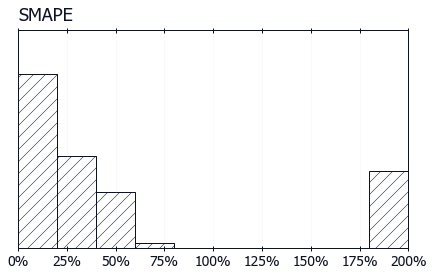

In [5]:
frame.blue.forecast.smape(actuals='process 1', forecast='process 2').plot(bins=10, figsize=(7,4))

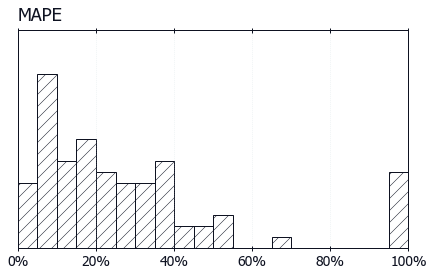

In [6]:
frame.blue.forecast.mape(actuals='process 1', forecast='process 2').plot(figsize=(7,4))

## Weighted Mean Absolute Percentage Error

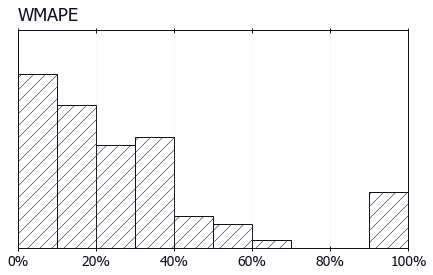

In [8]:
frame.blue.forecast.wmape(actuals='process 1', forecast='process 2').plot(bins=10, figsize=(7,4))

## Symmetric Mean Absolute Percentage Error

In [9]:
frame.blue.forecast.smape(actuals='process 1', forecast='process 2')

SMAPE(n=100, result=0.4375, zero='skip')

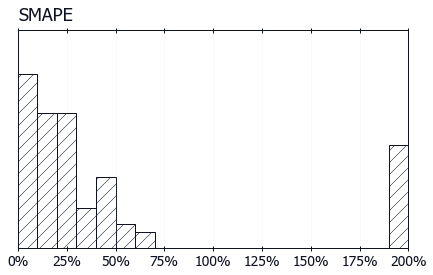

In [11]:
frame.blue.forecast.smape(actuals='process 1', forecast='process 2').plot(figsize=(7,4))

## Mean Directional Accuracy

In [12]:
frame.blue.forecast.mda(actuals='process 1', forecast='process 2')

MDA(n=100, result=0.5455)

## Mean Percentage Error

In [13]:
frame.blue.forecast.mpe(actuals='process 1', forecast='process 2')

MPE(n=100, result=0.0932, zero='skip')

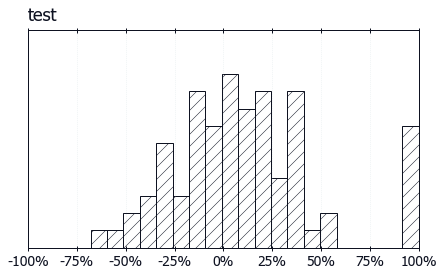

In [16]:
frame.blue.forecast.mpe(actuals='process 1', forecast='process 2').plot(figsize=(7,4), title='test')